## Exercício
Implemente o algortimo de conversão **<font color="red">R</font><font color="green">G</font><font color="blue">B</font>** para **HSV**, utilizando uma imagem de sua escolha.

Dicas:
* Você pode confirmar o resultado da sua conversão utilizando os métodos `minha_imagem_rgb.convert('HSV')` e `minha_imagem_hsv.convert('RGB')`, 
**considerando que as duas imagens são do PIL**, e depois convertendo-as para arrays do NumPy. Se as imagens forens iguais, sua conversão está correta;

* A operação $\frac{\Delta}{C_{max}}$ pode resultar em $\frac{0}{0}$. Neste caso, qualquer valor pode ser atribuído a $S$;

* Imagens do NumPy apresentam valores na faixa $[0; 1]$ (ou $[0; 255]$). Sendo assim, lembre-se de dividir $H$ por $360°$ (e depois multiplicar por $255$ caso seja um `np.uint8`).

C:\Users\izalo\AppData\Local\Temp\ipykernel_9144\861540505.py:28: RuntimeWarning: invalid value encountered in divide
  H[mask1] = 60 * (((G - B) / delta)[mask1])
C:\Users\izalo\AppData\Local\Temp\ipykernel_9144\861540505.py:29: RuntimeWarning: invalid value encountered in divide
  H[mask2] = 60 * (((G - B) / delta)[mask2] + 360)
C:\Users\izalo\AppData\Local\Temp\ipykernel_9144\861540505.py:30: RuntimeWarning: invalid value encountered in divide
  H[mask3] = 60 * (((B - R) / delta)[mask3] + 120)
C:\Users\izalo\AppData\Local\Temp\ipykernel_9144\861540505.py:31: RuntimeWarning: invalid value encountered in divide
  H[mask4] = 60 * (((R - G) / delta)[mask4] + 240)
C:\Users\izalo\AppData\Local\Temp\ipykernel_9144\861540505.py:34: RuntimeWarning: invalid value encountered in divide
  S = np.where(Cmax == 0, 0, delta / Cmax)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


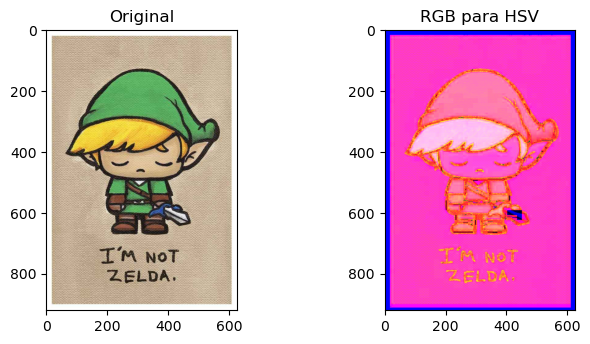

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

zelda = np.array(Image.open('zelda.jpg'))

def rgb_to_hsv(img):
    # Normalizando os valores de R, G e B para o intervalo [0, 1]
    rgb_img = img / 255.0
    
    # Extraindo os canais de cor normalizados
    R = rgb_img[:, :, 0]
    G = rgb_img[:, :, 1]
    B = rgb_img[:, :, 2]
    
    Cmax = np.maximum(np.maximum(R, G), B)
    Cmin = np.minimum(np.minimum(R, G), B)
    delta = Cmax - Cmin
    
    # Calculando H
    H = np.zeros_like(Cmax)
    # Condições corrigidas para cálculo de H
    mask1 = (Cmax == R) & (G >= B)
    mask2 = (Cmax == R) & (G < B)
    mask3 = Cmax == G
    mask4 = Cmax == B
    
    H[mask1] = 60 * (((G - B) / delta)[mask1])
    H[mask2] = 60 * (((G - B) / delta)[mask2] + 360)
    H[mask3] = 60 * (((B - R) / delta)[mask3] + 120)
    H[mask4] = 60 * (((R - G) / delta)[mask4] + 240)
    
    # Calculando S
    S = np.where(Cmax == 0, 0, delta / Cmax)
    
    # Calculando V
    V = Cmax
    
    # Normalizando H para o intervalo [0, 360]
    H = np.where(delta == 0, 0, H)
    
    # Criando a imagem HSV
    hsv_image = np.stack([H, S, V], axis=-1)
    
    return hsv_image

# Usando a função para converter uma imagem RGB para HSV
hsv_zelda = rgb_to_hsv(zelda)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(zelda)

plt.subplot(2,2,2)
plt.title('RGB para HSV')
plt.imshow(hsv_zelda)


Verificação:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


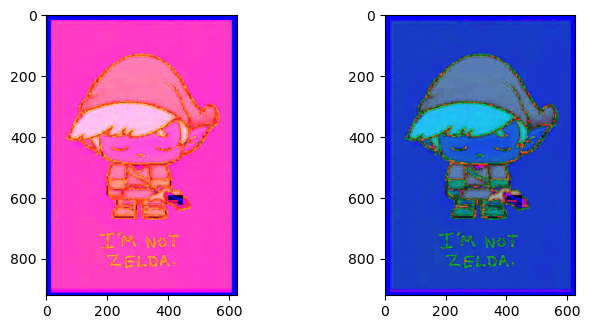

In [38]:
# Verificação:
img_hsv_verify = np.array(img.convert('HSV'))[:, :, :3]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(hsv_zelda)
plt.subplot(2, 2, 2)
plt.imshow(img_hsv_verify)

RGB para CMY:

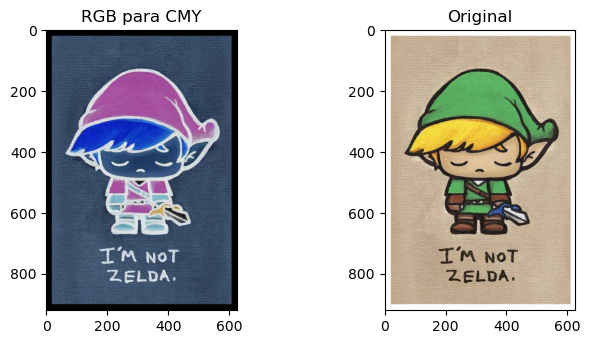

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

zelda = np.array(Image.open('zelda.jpg'))

def rgb_to_cmy(img):
    img_cmy = (255 - img) / 255
    
    return img_cmy

zelda_cmy = rgb_to_cmy(zelda)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('RGB para CMY')
plt.imshow(zelda_cmy)

plt.subplot(2, 2, 2)
plt.title('Original')
plt.imshow(zelda)


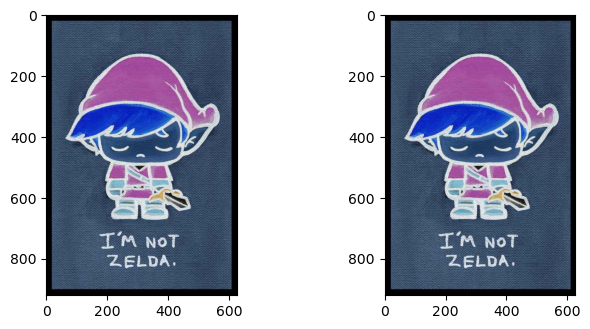

In [27]:
# Verificação:
img_cmy_verify = np.array(img.convert('CMYK'))[:, :, :3]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(zelda_cmy)
plt.subplot(2, 2, 2)
plt.imshow(img_cmy_verify)